In [12]:
import requests, zipfile, io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
url = "https://dane.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/dobowe/klimat/"
datapath = "C:/temp/"
years = ["2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018"]
yearsshr = ["2014","2015","2016","2017","2018"]
months = ["04","05","06","07","08","09","10"]

In [34]:
for year in years:
    for month in months:
        filename = year+"_"+month+"_k.zip"
        r = requests.get(url+year+"/"+filename)
        z = zipfile.ZipFile(io.BytesIO(r.content))
        z.extractall(datapath)

In [40]:
city = "PSZCZYNA"
wth_df = pd.DataFrame(index=pd.date_range(start='4/1/2018', end='10/31/2018'), columns=["day","month"])
index = wth_df.index
wth_df.index = wth_df.index.strftime('%#d-%#m')
wth_df["day"] = index.strftime('%#d')
wth_df["month"] = index.strftime('%#m')

In [41]:
for month in months:
    for year in years:
        csvfile = "C:/temp/k_d_"+month+"_"+year+".csv"
        temp_df = pd.read_csv(csvfile,sep=',',encoding = "ISO-8859-1",header=None)
        temp_df.index = temp_df[4].apply(str)+"-"+temp_df[3].apply(str)
        temp_df = temp_df.loc[temp_df[1] == city]
        for index,rows in temp_df.iterrows():
            wth_df.loc[index,year]=temp_df.loc[index,5]
        
wth_df
# wth_dff = wth_df.loc[wth_df[1] == city].drop(columns=[0,6,7,8,9,10,11,12,13,14,15,16,17])
# wth_dff = wth_df.loc[wth_df[1] == city].drop(columns=[0,6,7,8,9,10,11,12,13,14,15,16,17])
# wth_dff[6] = wth_dff[4].apply(str)+"_"+wth_dff[3].apply(str)+"_"+wth_dff[2].apply(str)
# # wth_dff[6] = wth_dff.apply(lambda row: row.4 + row.3, axis=1)
# wth_dff[6].to_datetime()
# wth_dff[5].plot()

,day,month,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1-4,1,4,15.0,15.5,14.9,18.3,5.9,2.0,15.9,5.4,14.5,24.2,9.1
2-4,2,4,9.5,14.0,9.1,15.4,9.4,4.0,13.8,3.8,13.8,25.9,11.6
3-4,3,4,10.5,20.4,12.4,19.0,14.9,2.5,20.7,5.9,20.4,18.6,19.5
4-4,4,4,9.5,21.9,17.4,20.0,20.3,2.4,18.8,5.5,24.9,21.7,18.1
5-4,5,4,10.0,21.5,12.3,14.4,14.1,3.5,13.0,5.9,25.9,17.2,16.6
6-4,6,4,13.0,17.6,7.9,14.4,5.9,3.1,14.9,4.5,20.8,9.7,12.1
7-4,7,4,11.0,21.9,11.4,21.4,11.9,4.7,19.3,9.8,17.3,7.7,16.6
8-4,8,4,11.5,23.4,17.4,16.4,4.0,6.9,21.9,8.4,11.7,17.2,22.2
9-4,9,4,18.9,20.8,14.9,11.4,6.4,4.8,14.0,14.3,7.6,15.0,25.3
10-4,10,4,20.9,20.4,9.4,12.9,14.4,11.4,8.9,18.1,7.0,19.7,19.2


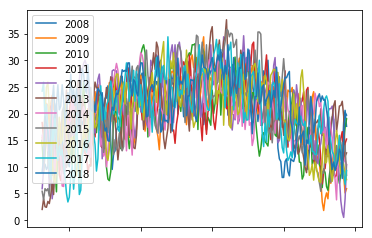

In [37]:
wth_df.plot()

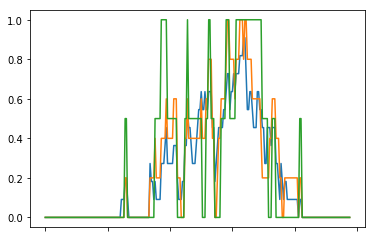

In [38]:
count20 = wth_df[years].rolling(window=7).mean()
count20 = count20[count20>25].count(axis='columns')/len(years)
count20.plot()
count20 = wth_df[yearsshr].rolling(window=7).mean()
count20 = count20[count20>25].count(axis='columns')/len(yearsshr)
count20.plot()
count20 = wth_df[["2017","2018"]].rolling(window=7).mean()
count20 = count20[count20>25].count(axis='columns')/2
count20.plot()

([<matplotlib.axis.XTick at 0x26e414713c8>,
 <a list of 8 Text xticklabel objects>)

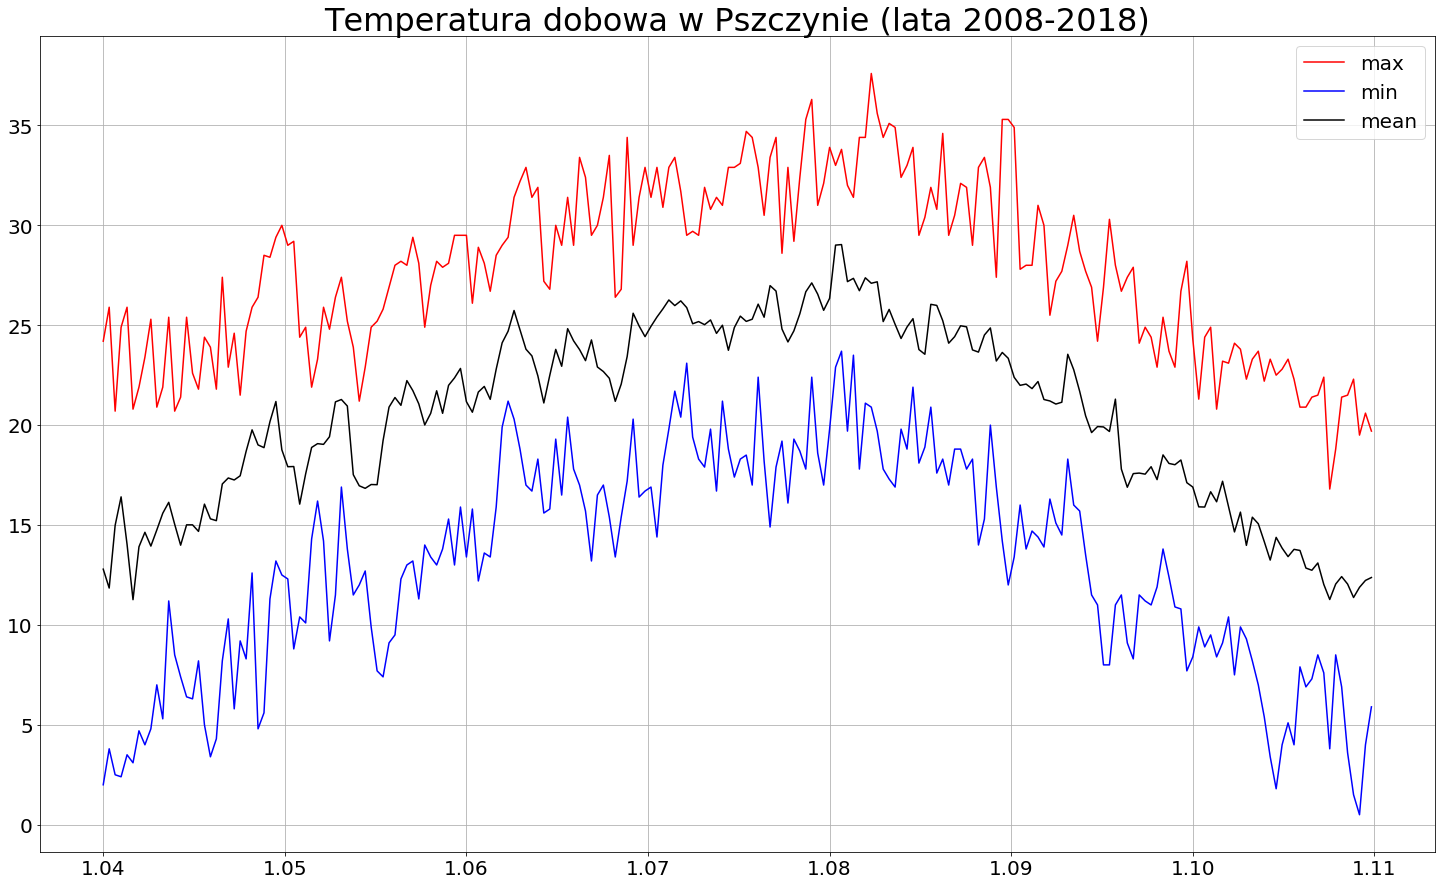

In [76]:
wth_df[years].max(axis=1).plot(figsize=(25,15),color='r')
wth_df[years].min(axis=1).plot(color='b')
wth_df[years].mean(axis=1).plot(color='k')
plt.title("Temperatura dobowa w Pszczynie (lata 2008-2018)", fontsize = 32)
plt.grid()
plt.legend(["max","min","mean"], fontsize =20)
# plt.axhline(y=25, color='r', linestyle='-')
# plt.axhline(y=20, color='k', linestyle='-')
# plt.axhline(y=15, color='b', linestyle='-')
plt.yticks(fontsize=20)
plt.xticks(np.arange(0, len(wth_df.index), step = 30.5), ["1.04","1.05","1.06","1.07","1.08","1.09","1.10","1.11"], fontsize=20)
# plt.xticks(wth_df.index, fontsize=12)